# Loan Prediction

https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [55]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [57]:
train['type']='train'
test['type']='test'

In [58]:
data=pd.concat([train,test],ignore_index=True)

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [59]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,type
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
type                 981 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


In [61]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
type                   0
dtype: int64

In [62]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [63]:
data['Dependents']=data['Dependents'].replace('3+','3')

In [64]:
data['Dependents']=data['Dependents'].astype(float)

In [65]:
m=data['Dependents'].median()
data['Dependents']=data['Dependents'].fillna(m)

In [66]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents             0
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
type                   0
dtype: int64

In [67]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [68]:
import statistics
mode1=statistics.mode(data['Credit_History'])
data['Credit_History']=data['Credit_History'].fillna(mode1)

In [69]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [70]:
data['Gender']=data['Gender'].fillna('Male')

In [71]:
med=data['LoanAmount'].median()
data['LoanAmount']=data['LoanAmount'].fillna(med)

In [72]:
med1=data['Loan_Amount_Term'].median()
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(med1)

In [73]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
type                   0
dtype: int64

In [74]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [75]:
data[data['Self_Employed']=='No'].count()

ApplicantIncome      807
CoapplicantIncome    807
Credit_History       807
Dependents           807
Education            807
Gender               807
LoanAmount           807
Loan_Amount_Term     807
Loan_ID              807
Loan_Status          500
Married              804
Property_Area        807
Self_Employed        807
type                 807
dtype: int64

In [76]:
data['Self_Employed']=data['Self_Employed'].fillna('No')

In [77]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed          0
type                   0
dtype: int64

In [78]:
data['Married']=data['Married'].fillna(method='ffill')

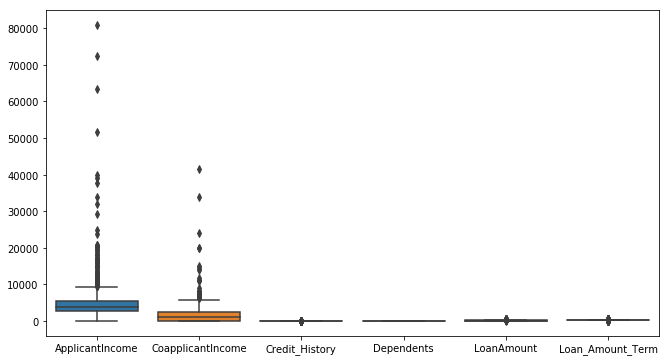

In [79]:
plt.figure(figsize=(11,6))
sns.boxplot(data=data)

In [28]:
#data1=pd.DataFrame(sl.fit_transform(data[['ApplicantIncome','CoapplicantIncome','Credit_History','Dependents','LoanAmount','Loan_Amount_Term']]),columns=['ApplicantIncome','CoapplicantIncome','Credit_History','Dependents','LoanAmount','Loan_Amount_Term'])
#data['ApplicantIncome']=data1['ApplicantIncome']
#data['CoapplicantIncome']=data1['CoapplicantIncome']
#data['Credit_History']=data1['Credit_History']
#data['Dependents']=data1['Dependents']
#data['LoanAmount']=data1['LoanAmount']
#data['Loan_Amount_Term']=data1['Loan_Amount_Term']
#a=np.array(data['ApplicantIncome'])
#cbt=np.cbrt(a)
#data['ApplicantIncome']=pd.DataFrame(cbt)
#b=np.array(data['CoapplicantIncome'])
#cbt1=np.cbrt(b)
#data['CoapplicantIncome']=pd.DataFrame(cbt1)
#c=np.array(data['Credit_History'])
#cbt2=np.cbrt(c)
#data['Credit_History']=pd.DataFrame(cbt2)
#d=np.array(data['Dependents'])
#cbt3=np.cbrt(d)
#data['Dependents']=pd.DataFrame(cbt3)
#e=np.array(data['LoanAmount'])
#cbt4=np.cbrt(e)
#data['LoanAmount']=pd.DataFrame(cbt4)
#f=np.array(data['Loan_Amount_Term'])
#cbt5=np.cbrt(f)
#data['Loan_Amount_Term']=pd.DataFrame(cbt5)

In [80]:
data=pd.get_dummies(data,columns=['Education','Gender','Married','Property_Area','Self_Employed'])
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']
data['Loan/Income']=data['LoanAmount']/data['TotalIncome']
data['Loan/Term']=data['LoanAmount']/data['Loan_Amount_Term']
data['RepaymentRatio']=(data['Loan/Term']*1000)/data['TotalIncome']

In [81]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,type,Education_Graduate,...,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,TotalIncome,Loan/Income,Loan/Term,RepaymentRatio
0,5849,0.0,1.0,0.0,126.0,360.0,LP001002,Y,train,1,...,0,0,0,1,1,0,5849.0,0.021542,0.350000,0.059839
1,4583,1508.0,1.0,1.0,128.0,360.0,LP001003,N,train,1,...,1,1,0,0,1,0,6091.0,0.021015,0.355556,0.058374
2,3000,0.0,1.0,0.0,66.0,360.0,LP001005,Y,train,1,...,1,0,0,1,0,1,3000.0,0.022000,0.183333,0.061111
3,2583,2358.0,1.0,0.0,120.0,360.0,LP001006,Y,train,0,...,1,0,0,1,1,0,4941.0,0.024287,0.333333,0.067463
4,6000,0.0,1.0,0.0,141.0,360.0,LP001008,Y,train,1,...,0,0,0,1,1,0,6000.0,0.023500,0.391667,0.065278


In [83]:
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
transformation=sl.fit(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])
data[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']]=transformation.transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [84]:
#Divide into test and train:
train = data.loc[data['type']=='train']
test = data.loc[data['type']=='test']

In [85]:
train=train.drop(['type','Loan_ID'],axis=1)
test=test.drop(['Loan_Status','Loan_ID','type'],axis=1)

In [86]:
X_train=train.drop('Loan_Status',axis=1)
y_train=train['Loan_Status']
X_test=test

In [87]:
y_train.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)

In [89]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train, y_train)
y_pred5=model.predict(X_test)

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [90]:
sub2=pd.DataFrame({'Loan_ID':a,'Loan_Status':y_pred5})
sub2['Loan_Status']=sub2['Loan_Status'].astype(str)
sub2['Loan_Status']=sub2['Loan_Status'].replace('1','Y')
sub2['Loan_Status']=sub2['Loan_Status'].replace('0','N')

In [91]:
model.score(X_train,y_train)

0.8127035830618893

In [92]:
sub2.to_csv('submission2.csv',index=False)